In [49]:
import math
import statistics
import numpy as np
import scipy.stats
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
from IPython.display import Math, Latex
from IPython.core.display import Image
import seaborn as sns
import statsmodels.api as sm
from scipy.stats import uniform

## Prepare Data

In [32]:
df = pd.read_csv('nyc-rolling-sales.csv', na_values=[' -  '] )


In [33]:
df.head()

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,...,5,0,5,1633.0,6440.0,1900,2,C2,6625000.0,2017-07-19 00:00:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,...,28,3,31,4616.0,18690.0,1900,2,C7,NaN,2016-12-14 00:00:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,...,16,1,17,2212.0,7803.0,1900,2,C7,NaN,2016-12-09 00:00:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,...,10,0,10,2272.0,6794.0,1913,2,C4,3936272.0,2016-09-23 00:00:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,...,6,0,6,2369.0,4615.0,1900,2,C2,8000000.0,2016-11-17 00:00:00


In [23]:
df.tail()

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
84543,8409,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,34,,B9,37 QUAIL LANE,...,2,0,2,2400.0,2575.0,1998,1,B9,450000.0,2016-11-28 00:00:00
84544,8410,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,78,,B9,32 PHEASANT LANE,...,2,0,2,2498.0,2377.0,1998,1,B9,550000.0,2017-04-21 00:00:00
84545,8411,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7351,60,,B2,49 PITNEY AVENUE,...,2,0,2,4000.0,1496.0,1925,1,B2,460000.0,2017-07-05 00:00:00
84546,8412,5,WOODROW,22 STORE BUILDINGS,4,7100,28,,K6,2730 ARTHUR KILL ROAD,...,0,7,7,208033.0,64117.0,2001,4,K6,11693337.0,2016-12-21 00:00:00
84547,8413,5,WOODROW,35 INDOOR PUBLIC AND CULTURAL FACILITIES,4,7105,679,,P9,155 CLAY PIT ROAD,...,0,1,1,10796.0,2400.0,2006,4,P9,69300.0,2016-10-27 00:00:00


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Unnamed: 0                      84548 non-null  int64  
 1   BOROUGH                         84548 non-null  int64  
 2   NEIGHBORHOOD                    84548 non-null  object 
 3   BUILDING CLASS CATEGORY         84548 non-null  object 
 4   TAX CLASS AT PRESENT            84548 non-null  object 
 5   BLOCK                           84548 non-null  int64  
 6   LOT                             84548 non-null  int64  
 7   EASE-MENT                       84548 non-null  object 
 8   BUILDING CLASS AT PRESENT       84548 non-null  object 
 9   ADDRESS                         84548 non-null  object 
 10  APARTMENT NUMBER                84548 non-null  object 
 11  ZIP CODE                        84548 non-null  int64  
 12  RESIDENTIAL UNITS               

In [35]:
df.isnull().sum()

Unnamed: 0                            0
BOROUGH                               0
NEIGHBORHOOD                          0
BUILDING CLASS CATEGORY               0
TAX CLASS AT PRESENT                  0
BLOCK                                 0
LOT                                   0
EASE-MENT                             0
BUILDING CLASS AT PRESENT             0
ADDRESS                               0
APARTMENT NUMBER                      0
ZIP CODE                              0
RESIDENTIAL UNITS                     0
COMMERCIAL UNITS                      0
TOTAL UNITS                           0
LAND SQUARE FEET                  26252
GROSS SQUARE FEET                 27612
YEAR BUILT                            0
TAX CLASS AT TIME OF SALE             0
BUILDING CLASS AT TIME OF SALE        0
SALE PRICE                        14561
SALE DATE                             0
dtype: int64

In [36]:
df = df.drop(['Unnamed: 0',
                  'NEIGHBORHOOD', 
                  'BUILDING CLASS CATEGORY', 
                  'EASE-MENT', 
                  'ADDRESS', 
                  'APARTMENT NUMBER', 
                  'ZIP CODE', 
                  'LAND SQUARE FEET', 
                  'GROSS SQUARE FEET',
                  'SALE DATE'], axis=1)

In [37]:
df['SALE PRICE'].fillna(0, inplace=True)

In [38]:
df = df[(df['SALE PRICE'] > 10000) & (df['SALE PRICE'] < 800000)]

## Measure of Central Tendency
### Mean , Median , Modus , Range , Variance and Standard Deviation

In [39]:
#Melakukan encode pada kolom BOROUGH
df['BOROUGH']= df['BOROUGH'].map({1:'Manhattan', 2:'Bronx', 3: 'Brooklyn', 4:'Queens',5:'Staten Island'})
df.head()

,BOROUGH,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE
13,Manhattan,2,373,40,C6,0,0,0,1920,2,C6,499000.0
15,Manhattan,2,373,40,C6,0,0,0,1920,2,C6,529500.0
16,Manhattan,2,373,40,C6,0,0,0,1920,2,C6,423000.0
17,Manhattan,2,373,46,C6,0,0,0,1925,2,C6,501000.0
18,Manhattan,2,373,49,C6,0,0,0,1920,2,C6,450000.0


In [41]:
#Menghitung nilai mean SALE PRICE pada setiap data di kolom BOROUGH
mean_price = df[['BOROUGH','SALE PRICE']].groupby('BOROUGH').mean().sort_values(by='SALE PRICE', ascending=True)
mean_price

,SALE PRICE
BOROUGH,
Bronx,374214.637916
Queens,418008.129188
Staten Island,443064.723897
Brooklyn,462611.765501
Manhattan,524401.066320


In [44]:
#Menghitung nilai median SALE PRICE pada setiap data di kolom BOROUGH
median_price = df[['BOROUGH','SALE PRICE']].groupby('BOROUGH').median().sort_values(by='SALE PRICE', ascending=True)
median_price

,SALE PRICE
BOROUGH,
Bronx,375963.0
Queens,405000.0
Staten Island,450000.0
Brooklyn,478975.0
Manhattan,554612.0


In [45]:
#Menghitung nilai modus TOTAL UNIT pada setiap data di kolom BOROUGH
modus_price = df[['BOROUGH','TOTAL UNITS']].groupby(['BOROUGH']).apply(pd.DataFrame.mode).reset_index(drop=True)
modus_price

,BOROUGH,TOTAL UNITS
0,Bronx,1
1,Brooklyn,1
2,Manhattan,0
3,Queens,1
4,Staten Island,1


In [46]:
#Menghitung nilai range SALE PRICE pada setiap data di kolom BOROUGH
range_price = df.groupby('BOROUGH').apply(lambda x: x['SALE PRICE'].max() - x['SALE PRICE'].min())
range_price

BOROUGH
Bronx            788500.0
Brooklyn         789286.0
Manhattan        789949.0
Queens           789998.0
Staten Island    788500.0
dtype: float64

In [47]:
#Menghitung nilai variance pada setiap data di kolom BOROUGH
var_all = df.groupby('BOROUGH').var()
var_all

,BLOCK,LOT,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,YEAR BUILT,TAX CLASS AT TIME OF SALE,SALE PRICE,MEAN PRICE
BOROUGH,,,,,,,,,
Bronx,1.079957e+06,614413.957465,57.418290,0.050627,57.439275,267577.207018,0.360109,3.543335e+10,NaN
Brooklyn,6.828706e+06,281849.273294,26.706550,0.108575,26.812539,309783.886202,0.514484,4.160930e+10,NaN
Manhattan,2.833641e+05,643218.004940,69.493962,0.333420,72.162594,259725.935825,0.153430,3.543372e+10,NaN
Queens,1.883718e+07,257021.672784,286.213464,373.181270,665.294584,153744.214075,0.348967,3.770525e+10,NaN
Staten Island,5.202425e+06,199645.537888,7.834611,3.025381,10.774337,89453.631284,0.200883,2.724076e+10,NaN


In [48]:
#Menghitung nilai standar deviasi pada setiap data di kolom BOROUGH
std_all = df.groupby('BOROUGH').std()
std_all

,BLOCK,LOT,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,YEAR BUILT,TAX CLASS AT TIME OF SALE,SALE PRICE,MEAN PRICE
BOROUGH,,,,,,,,,
Bronx,1039.209961,783.845621,7.577486,0.225005,7.578870,517.278655,0.600091,188237.476274,NaN
Brooklyn,2613.179371,530.894786,5.167838,0.329507,5.178083,556.582327,0.717276,203983.571174,NaN
Manhattan,532.319529,802.008731,8.336304,0.577425,8.494857,509.633138,0.391702,188238.475460,NaN
Queens,4340.181479,506.973049,16.917845,19.317900,25.793305,392.102301,0.590734,194178.408115,NaN
Staten Island,2280.882463,446.817119,2.799038,1.739362,3.282429,299.087999,0.448200,165047.754393,NaN


C:\Users\dikid\AppData\Local\Temp\ipykernel_19668\1830581077.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(br['SALE PRICE'],


[Text(0.5, 0, 'Price'),
 Text(0, 0.5, 'Probability of Occurence'),
 Text(0.5, 1.0, 'Distribution of Sale Price in Queens')]

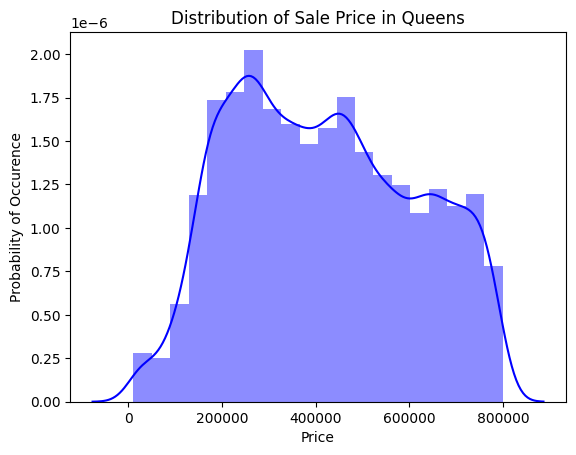

In [54]:
df1 = df.groupby("BOROUGH")
br = df1.get_group('Queens')

ax = sns.distplot(br['SALE PRICE'],
                  kde=True,
                  bins=20,
                  color='blue',
                  hist_kws={"linewidth": 15,'alpha':0.45})

ax.set(xlabel='Price', 
       ylabel='Probability of Occurence', 
       title='Distribution of Sale Price in Queens')

In [56]:
#Menampilkan mean, standard deviation, dan population size dari SALE PRICE
ci=df.groupby("BOROUGH").agg({"SALE PRICE": [np.mean, np.std, np.size]})
ci

SALE PRICE                      
                        mean            std   size
BOROUGH                                           
Bronx          374214.637916  188237.476274   4452
Brooklyn       462611.765501  203983.571174   7838
Manhattan      524401.066320  188238.475460   4810
Queens         418008.129188  194178.408115  13701
Staten Island  443064.723897  165047.754393   5306

In [57]:
#Mengekstrak parameter yang diperlukan
mean_sp = ci.iloc[0,0]
sd = ci.iloc [0,1]
n = ci.iloc [0,2]         
z = 1.96    

In [58]:
#Menghitung standard error menggunakan formula untuk standard error dari mean
se = sd / np.sqrt(n)

In [59]:
#Membangun CI
lcb = mean_sp - z * se
ucb = mean_sp + z * se
lcb, ucb

(368685.15417842224, 379744.1216526649)

In [66]:
from scipy.stats import pearsonr
df1 = df.groupby("BOROUGH")
mh = df1.get_group('Bronx')
sp = mh['SALE PRICE']

from scipy.stats import shapiro
stat, p = shapiro(sp)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably Gaussian')
else:
    print('Probably not Gaussian')

stat=0.976, p=0.000
Probably not Gaussian


In [67]:
from scipy.stats import pearsonr
df1 = df.groupby("BOROUGH")
br = df1.get_group('Queens')
sp1 = br['SALE PRICE']

from scipy.stats import normaltest
stat, p = normaltest(sp1)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably Gaussian')
else:
    print('Probably not Gaussian')

stat=3082.690, p=0.000
Probably not Gaussian


In [68]:
from scipy.stats import pearsonr
df1 = df.groupby("BOROUGH")
brok = df1.get_group('Staten Island')
sp2 = brok['SALE PRICE']

from scipy.stats import anderson
results = anderson(sp2)
print('stat=%.3f' % (results.statistic))
for i in range(len(results.critical_values)):
      sl, cv = results.significance_level[i], results.critical_values[i]
      if results.statistic < cv:
          print('Probably Gaussian at the %.1f%% level' % (sl))
      else:
          print('Probably not Gaussian at the %.1f%% level' % (sl))

stat=3.592
Probably not Gaussian at the 15.0% level
Probably not Gaussian at the 10.0% level
Probably not Gaussian at the 5.0% level
Probably not Gaussian at the 2.5% level
Probably not Gaussian at the 1.0% level


# Conclusions

1. Nilai Mean price tertinggi pada Manhattan dengan nilai 524401 554612
2. Nilai Median price tertinggi pada Manhattan dengan nilai 554612
3. Range semua nilai tidak jauh beda dinilai 780000
4. Berdasarkan pengujian hipotesis, didapatkan p-value < 0.05 sehingga sampel tidak berdistribusi Gaussian.

